<a href="https://colab.research.google.com/github/ToobaAhmedAlvi/Data-science/blob/main/Global_AI_Hub_Deep_Learning_Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split as tts, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats

In [ ]:
data= pd.read_csv("insurance.csv")
df= data.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Data Visualization

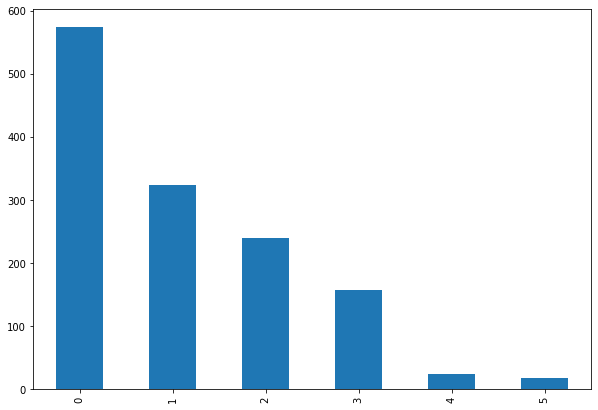

In [ ]:
plt.figure(figsize=(10,7))
data["children"].value_counts().plot.bar()

In [ ]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


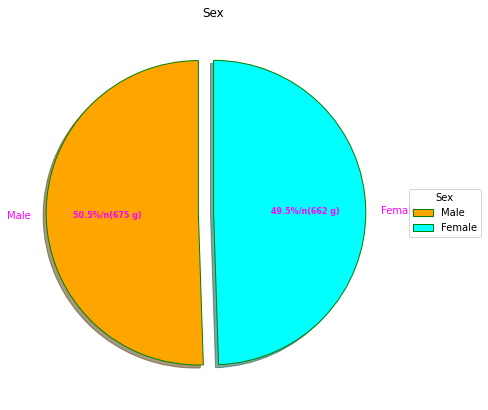

In [ ]:
fig, ax= plt.subplots(figsize=(10, 7))

sex=["Male", "Female"]

data= [data["sex"].value_counts().values]

explode=(0.1, 0.0)

colors=("orange", "cyan")

wp= {"linewidth":1, "edgecolor":"green"}

def func(pct ,allValues):
  absolute= int(pct/100.*np.sum(allValues))
  return "{:.1f}%/n({:d} g)".format(pct, absolute)

wedges, text, autotexts= ax.pie(data,
                                autopct= lambda pct:func(pct, data),
                                explode=explode,
                                labels= sex,
                                shadow= True,
                                colors= colors,
                                startangle= 90,
                                wedgeprops= wp,
                                textprops= dict(color= "magenta")
                                )

ax.legend(wedges, sex,
          title= "Sex",
          loc= "center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight= "bold")
ax.set_title("Sex")

plt.show()


In [ ]:
print(f"""
{type(data)}
{type(df)}
"""
)


<class 'list'>
<class 'pandas.core.frame.DataFrame'>



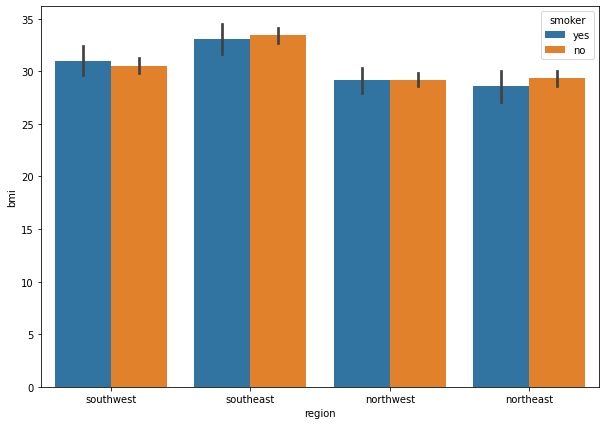

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="region", y="bmi", hue="smoker", data=df);

## 1. Label Encoding

In [ ]:
def label_encoding(columnName):
  label_encoder= LabelEncoder()
  df[columnName]= label_encoder.fit_transform(df[columnName])

In [ ]:
label_encoding("smoker")
label_encoding("sex")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
one_hot= pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
df = pd.concat([df, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [ ]:
X_train, X_val, y_train, y_val=tts(X, y, 
                                   test_size=0.2,
                                   random_state=42)

In [ ]:
print(f"""
Shape of X_train: {X_train.shape}
Shape of y_train: {y_train.shape}

Shape of X_val: {X_val.shape}
Shape of y_val: {y_val.shape}
""")


Shape of X_train: (1070, 9)
Shape of y_train: (1070,)

Shape of X_val: (268, 9)
Shape of y_val: (268,)



In [ ]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()

In [ ]:
linregScores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [ ]:
linregScores

array([-36935397.24633981, -43307871.90469339, -27392943.33594101,
       -36545076.53517248, -34064321.21101744, -37545462.85261907,
       -53003844.65025207, -39666927.56171686, -38357145.09175086,
       -32042446.75311643])

In [ ]:
DecTreeScores = cross_val_score(DecTree,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [ ]:
DecTreeScores

array([-37072561.71573401, -41144607.64084485, -52606444.01021875,
       -45019903.03161598, -47679809.35523843, -35972088.30549164,
       -50565087.87150165, -52025087.5565076 , -47362432.99160695,
       -31063739.36991163])

In [ ]:
RandForestScores = cross_val_score(RandForest,
                                   X_train, y_train,
                                   scoring="neg_mean_squared_error",
                                   cv=10)
RandForestScores

array([-23504127.77562434, -27189894.96774533, -15906888.96262876,
       -19960332.36896291, -27639468.2542206 , -25095436.87725321,
       -30904833.13715272, -29505727.9696041 , -26319071.62257038,
       -21943955.8206851 ])

In [ ]:
SVMScores = cross_val_score(SVM,
                            X_train, y_train,
                            scoring="neg_mean_squared_error",
                            cv=10)
SVMScores

array([-1.56939674e+08, -1.55688887e+08, -1.64428208e+08, -2.10106259e+08,
       -1.69069136e+08, -1.08552023e+08, -1.51800872e+08, -1.47702857e+08,
       -1.67329025e+08, -1.50282422e+08])

In [ ]:
def scoreDisplay(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores: {scores}
  Mean: {scores.mean()}
  Standart Deviation: {scores.std()}
  """)

In [ ]:
scoreDisplay(linregScores)


  RMSE Scores: [6077.44989665 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7280.37393616 6298.16858791 6193.3145481  5660.60480453]
  Mean: 6133.376271799343
  Standart Deviation: 517.5318567882914
  


In [ ]:
scoreDisplay(DecTreeScores)


  RMSE Scores: [6088.72414515 6414.40625786 7253.02998823 6709.68725289 6905.05679595
 5997.67357444 7110.91329377 7212.84185024 6882.03697982 5573.48538797]
  Mean: 6614.785552630943
  Standart Deviation: 543.8642087618002
  


In [ ]:
scoreDisplay(RandForestScores)


  RMSE Scores: [4848.10558627 5214.39305842 3988.34413794 4467.69877778 5257.32519959
 5009.53459687 5559.21155715 5431.91752235 5130.21165475 4684.43762054]
  Mean: 4959.117971165923
  Standart Deviation: 451.7994286228273
  


In [ ]:
scoreDisplay(SVMScores)


  RMSE Scores: [12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757]
  Mean: 12541.318099949585
  Standart Deviation: 951.4602172803403
  


## Parameter Tuning

In [ ]:
params = {'n_estimators' : [3,10,20,50,70,90,120],
          "n_jobs" : [2,3,4,10,15,25,50]}

In [ ]:
grid_s = GridSearchCV(RandForest, params,
                      cv=5,
                      scoring="neg_mean_squared_error")

In [ ]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50, 70, 90, 120],
                         'n_jobs': [2, 3, 4, 10, 15, 25, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_s.best_params_

{'n_estimators': 90, 'n_jobs': 3}

In [ ]:
for mean_score, params in zip((grid_s.cv_results_["mean_test_score"]),
                               (grid_s.cv_results_["params"])):
  print(np.sqrt(-mean_score), '       ', params)


5553.324383800697         {'n_estimators': 3, 'n_jobs': 2}
5614.328774052393         {'n_estimators': 3, 'n_jobs': 3}
5691.690165520988         {'n_estimators': 3, 'n_jobs': 4}
5473.780887345665         {'n_estimators': 3, 'n_jobs': 10}
5575.915977662574         {'n_estimators': 3, 'n_jobs': 15}
5403.619544953991         {'n_estimators': 3, 'n_jobs': 25}
5596.901673383005         {'n_estimators': 3, 'n_jobs': 50}
5194.34326553983         {'n_estimators': 10, 'n_jobs': 2}
5166.096234096153         {'n_estimators': 10, 'n_jobs': 3}
5133.649765312199         {'n_estimators': 10, 'n_jobs': 4}
5133.8939824282         {'n_estimators': 10, 'n_jobs': 10}
5083.1442177732915         {'n_estimators': 10, 'n_jobs': 15}
5084.778134272009         {'n_estimators': 10, 'n_jobs': 25}
5152.123995330537         {'n_estimators': 10, 'n_jobs': 50}
5013.106274515418         {'n_estimators': 20, 'n_jobs': 2}
4970.471134065028         {'n_estimators': 20, 'n_jobs': 3}
4944.478459600803         {'n_estimators'

## Predicting

In [ ]:
predictions = grid_s.best_estimator_.predict(X_val)

In [ ]:
y_val[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [ ]:
comparison = pd.DataFrame({"y_val" : y_val[0:10].values,
                           "Predictions" : predictions[0:10]})

In [ ]:
comparison

,y_val,Predictions
0,9095.06825,10435.517321
1,5272.17580,5174.065074
2,29330.98315,28219.124180
3,9301.89355,10822.070478
4,33750.29180,34849.988815
5,4536.25900,9805.846852
6,2117.33885,2085.617700
7,14210.53595,14982.690189
8,3732.62510,6670.580242
9,10264.44210,11130.095419


## Evaluation

In [ ]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_val, preds)
  rmse=np.sqrt(mse)
  r_squared = r2_score(y_val, preds)
  mae = mean_absolute_error(y_val, preds)

  print(f"Mean Absolute Error: {mae}\nMean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}\nR Squared Error: {r_squared}")

In [ ]:
regression_evaluation(predictions)

Mean Absolute Error: 2536.3128975526197
Mean Squared Error: 21230007.69485071
Root Mean Squared Error: 4607.603248420019
R Squared Error: 0.8632516511352257


In [ ]:
confidence = 0.95
squared_errors = (predictions-y_val)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([3664.15800966, 5388.31712782])